In [171]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from functools import partial

In [172]:
def is_fininshed(k, kmax, grad_f, xk, xk_1, x0, tolf, tolx):
    flag_rel = np.linalg.norm(grad_f(xk))**2 < (tolf * np.linalg.norm(grad_f(x0))**2)
    flag_abs = np.linalg.norm(xk-xk_1)**2 < tolx
    return k>=kmax or (flag_rel and flag_abs)

In [173]:
def armijo_alpha(f, grad_f, x):
    '''
    Gets the right alpha to satisfy the armijo rule (or sufficient decrease condition)
    '''
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x)) ** 2: # "non" sufficient decrease condition (only when it leaves the loop it is <=)
        # decrease alpha
        alpha = tau * alpha
        if alpha < 1e-3:
            # stopping condition to avoid too long loops
            break
    
    return alpha

In [174]:
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, alpha_type, alpha_value=1e-3):
    '''
    Input:
        f: the function f(x) we want to optimize. It is supposed to be a Python function, not an array.
        grad_f: the gradient of f(x). It is supposed to be a Python function, not an array.
        x0: an n-dimensional array which represents the initial iterate.
        kmax: an integer. The maximum possible number of iterations (to avoid infinite loops)
        tolf: small float. The relative tollerance of the algorithm. Convergence happens if ||grad_f(x_k)||_2 < tolf ||grad_f(x_0)||_2
        tolx: small float. The tollerance in the input domain. Convergence happens if ||x_{k} - x_{k-1}||_2 < tolx.
    
    Output:
        x: an array that contains the value of x_k FOR EACH iterate x_k (not only the latter).
        k: an integer. The number of iteration needed to converge. k < kmax.
        f_val: an array that contains the value of f(x_k) FOR EACH iterate x_k.
        grads: an array that contains the value of grad_f(x_k) FOR EACH iterate x_k.
        err: an array the contains the value of ||grad_f(x_k)||_2 FOR EACH iterate x_k.
    '''

    x = [x0]
    k = 0
    flag = True
    
    while flag:

        if alpha_type == "constant":
            alpha = alpha_value
        elif alpha_type == "armijo":
            alpha = armijo_alpha(f, grad_f, x[k])
        else:
            raise NotImplementedError("The alpha type '{}' is not implemented yet".format(alpha_type))

        new_value = x[k] - alpha * grad_f(x[k])
        x.append(new_value)
        k += 1
        flag = not is_fininshed(k, kmax, grad_f, x[-1], x[-2], x[0], tolf, tolx)

    grads = [grad_f(xk) for xk in x]
    return \
        x, \
        k, \
        [f(xk) for xk in x], \
        grads, \
        [np.linalg.norm(e)**2 for e in grads]


Gd with backtracking, GD without (trying different alphas)

plot norm of grad_f (check total number of iterations in different cases)

fix x=np.zeros(n), kmax=100, tolf/tolx <= 10^-6

plot norm(xk-xTRUE) if available

In [175]:
def function_1(x):
    x1, x2 = x[0], x[1]
    return (x1-3)**2 + (x2-1)**2

def func_1_for_contour(x, y):
    return (x-3)**2 + (y-1)**2

def grad_1(x):
    x1, x2 = x[0], x[1]
    return np.array([2*(x1-3),2*(x2-1)])

x_true = np.array([3, 1])

In [176]:
values_list = [
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
    {"alpha_type": "constant", "alpha_value":1e-1, "legend":"1e-1"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
    {"alpha_type": "constant", "alpha_value":1e-3, "legend":"1e-3"},
]

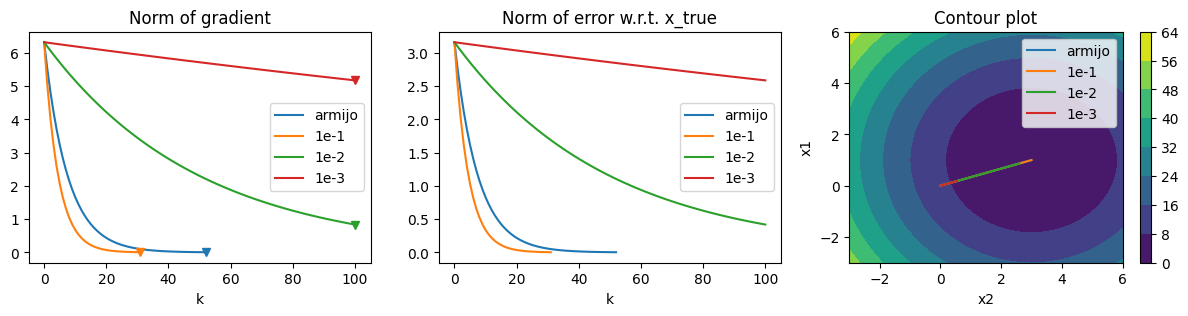

In [177]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for values in values_list:
    x, k, f_x, grad_x, err_x = gradient_descent(function_1, grad_1, np.zeros(2), kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

    p = axs[0].plot([np.linalg.norm(g) for g in grad_x])
    axs[0].plot(len(grad_x)-1, np.linalg.norm(grad_x[-1]), p[0].get_color(), marker="v", label='_nolegend_')

    axs[1].plot([np.linalg.norm(xk - x_true) for xk in x])
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])

axs[0].set_title("Norm of gradient")
axs[0].set_xlabel("k")

axs[1].set_title("Norm of error w.r.t. x_true")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")
xlist = np.linspace(-3.0, 6.0, 100)
ylist = np.linspace(-3.0, 6.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_1_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

for ax in axs:
    ax.legend([val["legend"] for val in values_list])

plt.show()

In [178]:
def function_2(x):
    x1, x2 = x[0], x[1]
    return 10*(x1-1)**2 + (x2-2)**2

def func_2_for_contour(x, y):
    return 10*(x-1)**2 + (y-2)**2

def grad_2(x):
    x1, x2 = x[0], x[1]
    return np.array([20*(x1-1),2*(x2-2)])

x_true = np.array([1, 2])

In [179]:
values_list = [
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
    {"alpha_type": "constant", "alpha_value":1e-1, "legend":"1e-1"},
    {"alpha_type": "constant", "alpha_value":8e-2, "legend":"8e-2"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
]

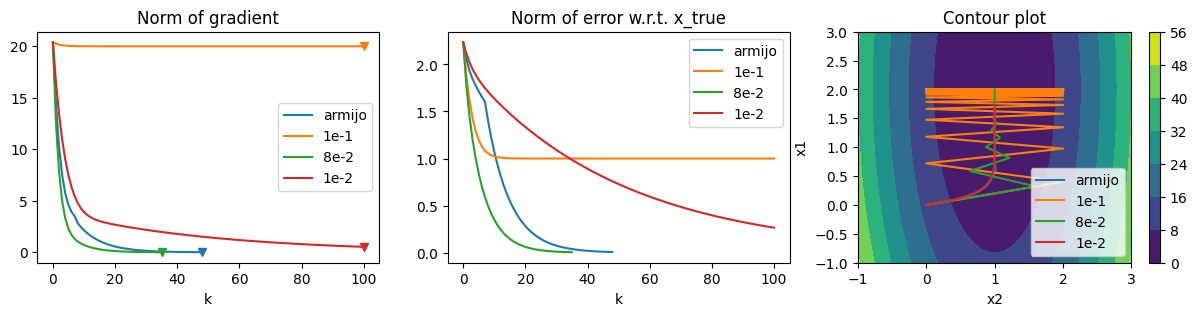

In [180]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

for values in values_list:
    x, k, f_x, grad_x, err_x = gradient_descent(function_2, grad_2, np.zeros(2), kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

    p = axs[0].plot([np.linalg.norm(g) for g in grad_x]) ###
    axs[0].plot(len(grad_x)-1, np.linalg.norm(grad_x[-1]), p[0].get_color(), marker="v", label='_nolegend_')

    axs[1].plot([np.linalg.norm(xk - x_true) for xk in x])
    axs[2].plot([xk[0] for xk in x], [xk[1] for xk in x])

axs[0].set_title("Norm of gradient")
axs[0].set_xlabel("k")

axs[1].set_title("Norm of error w.r.t. x_true")
axs[1].set_xlabel("k")

axs[2].set_title("Contour plot")
axs[2].set_ylabel("x1")
axs[2].set_xlabel("x2")
xlist = np.linspace(-1.0, 3.0, 100)
ylist = np.linspace(-1.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = func_2_for_contour(X, Y)
cp = axs[2].contourf(X, Y, Z)
fig.colorbar(cp)

for ax in axs:
    ax.legend([val["legend"] for val in values_list])

plt.show()

In [181]:
def function_3(x, A, b):
    return 0.5*np.linalg.norm(A @ x - b)**2

def grad_3(x, A, b):
    return (A @ x - b).T @ A

def get_A_b(n):
    x_true = np.ones(n)
    A = np.vander(x=np.linspace(0, 1, n))
    b = A @ x_true
    return A, b

In [182]:
def plot_results(n):
    A, b = get_A_b(n)
    partial_f3 = partial(function_3, A=A, b=b)
    partial_grad3 = partial(grad_3, A=A, b=b)
    x_true = np.ones(n)
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 3))

    for values in values_list:
        x, k, f_x, grad_x, err_x = gradient_descent(partial_f3, partial_grad3, np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

        p = axs[0].plot([np.linalg.norm(g) for g in grad_x]) ###
        axs[0].plot(len(grad_x)-1, np.linalg.norm(grad_x[-1]), p[0].get_color(), marker="v", label='_nolegend_')

        axs[1].plot([np.linalg.norm(xk - x_true) for xk in x])

    axs[0].set_title("Norm of gradient, n = {}".format(n))
    axs[0].set_xlabel("k")

    axs[1].set_title("Norm of error w.r.t. x_true, n = {}".format(n))
    axs[1].set_xlabel("k")

    for ax in axs:
        ax.legend([val["legend"] for val in values_list])

    plt.show()

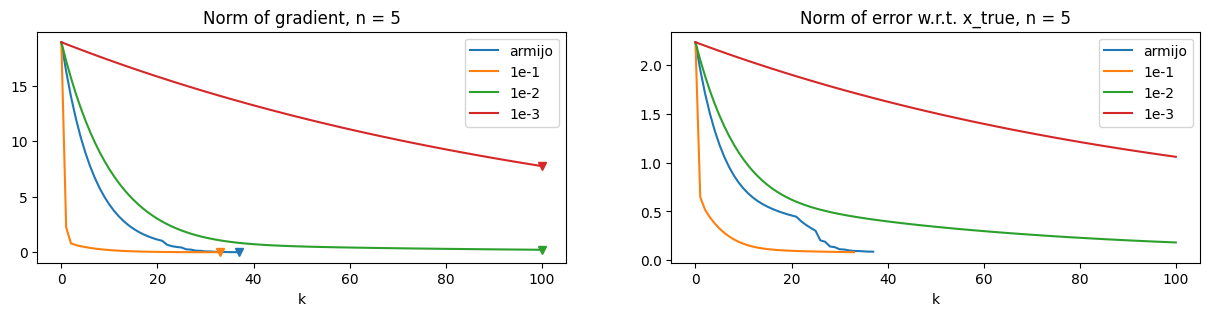

In [183]:
values_list = [
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
    {"alpha_type": "constant", "alpha_value":1e-1, "legend":"1e-1"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
    {"alpha_type": "constant", "alpha_value":1e-3, "legend":"1e-3"},
]
plot_results(5)

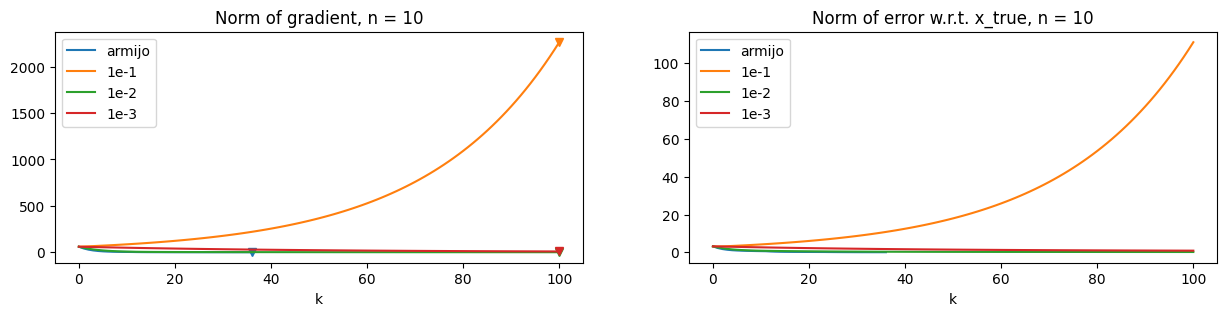

In [184]:
plot_results(10)

oss: 1e-1 diverges if the dimension of the problem increases too much

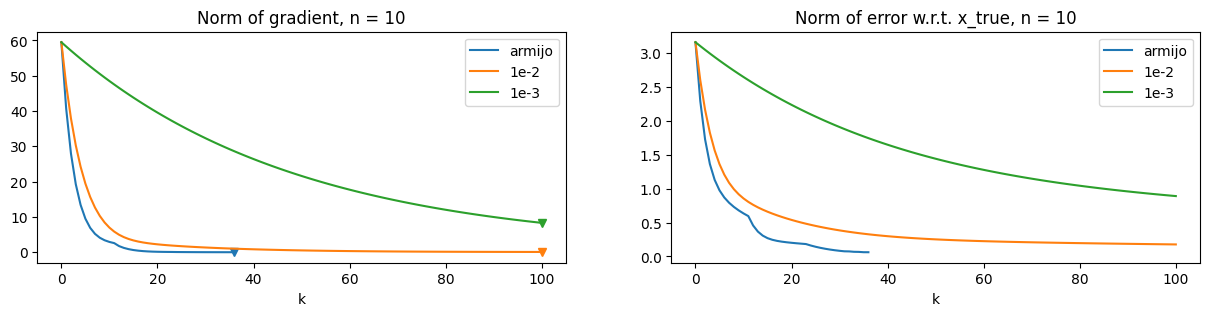

In [185]:
values_list = [
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
    {"alpha_type": "constant", "alpha_value":1e-3, "legend":"1e-3"},
]
plot_results(10)

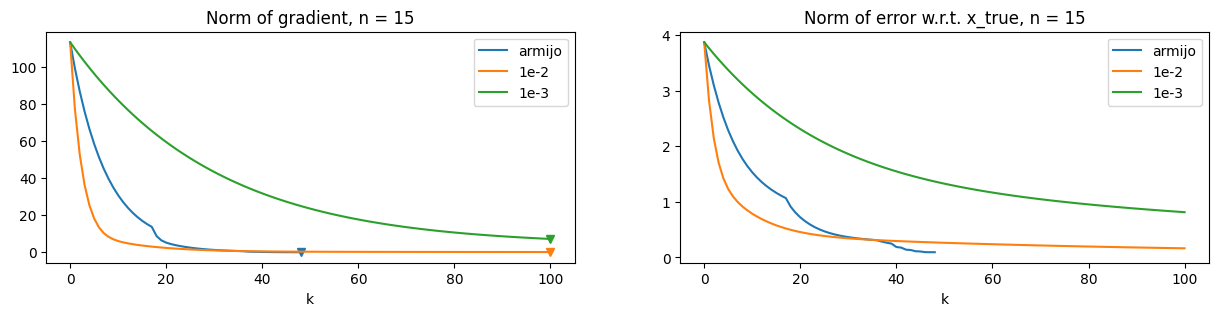

In [186]:
plot_results(15)

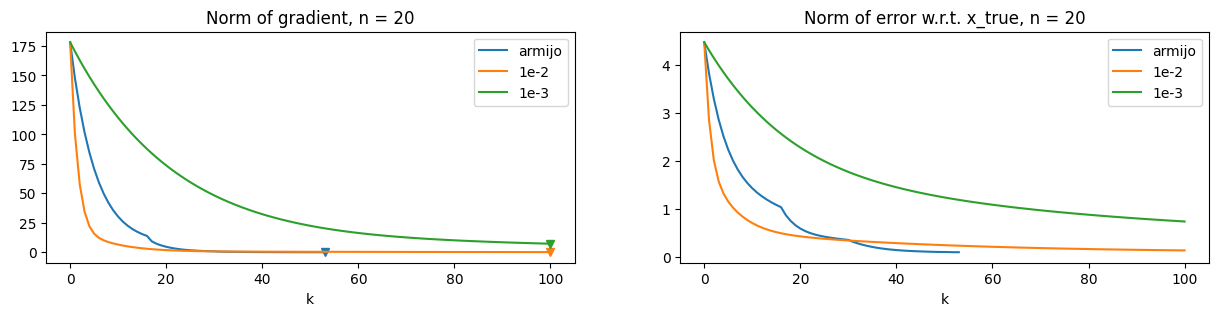

In [187]:
plot_results(20)

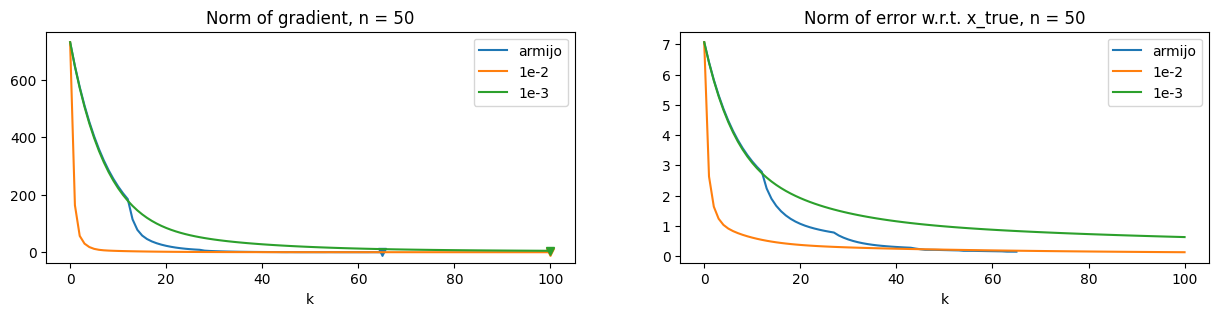

In [188]:
plot_results(50)


oss: constant alpha never converges for kmax=100, armijo does

moreover armijo follows 1e-3 at the beginning probably because it does not find a bigger value of alpha to satisfy the sufficient decrease condition, and we set its minimum value to 1e-3

In [189]:
def function_4(x, A, b, l):
    return 0.5*np.linalg.norm(A @ x - b)**2 + l/2*np.linalg.norm(x)**2

def grad_4(x, A, b, l):
    return (A @ x - b).T @ A + (l*x)

def get_A_b(n):
    x_true = np.ones(n)
    A = np.vander(x=np.linspace(0, 1, n))
    b = A @ x_true
    return A, b

In [190]:
def plot_results(n, l, axs):
    A, b = get_A_b(n)
    partial_f4 = partial(function_4, A=A, b=b, l=l)
    partial_grad4 = partial(grad_4, A=A, b=b, l=l)
    
    for values in values_list:
        x, k, f_x, grad_x, err_x = gradient_descent(partial_f4, partial_grad4, np.zeros(n), kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

        p = axs.plot([np.linalg.norm(g) for g in grad_x]) ###
        axs.plot(len(grad_x)-1, np.linalg.norm(grad_x[-1]), p[0].get_color(), marker="v", label='_nolegend_')


    axs.set_title("Norm of gradient, n = {}, lambda = {}".format(n,l))
    axs.set_xlabel("k")
    axs.legend([val["legend"] for val in values_list])


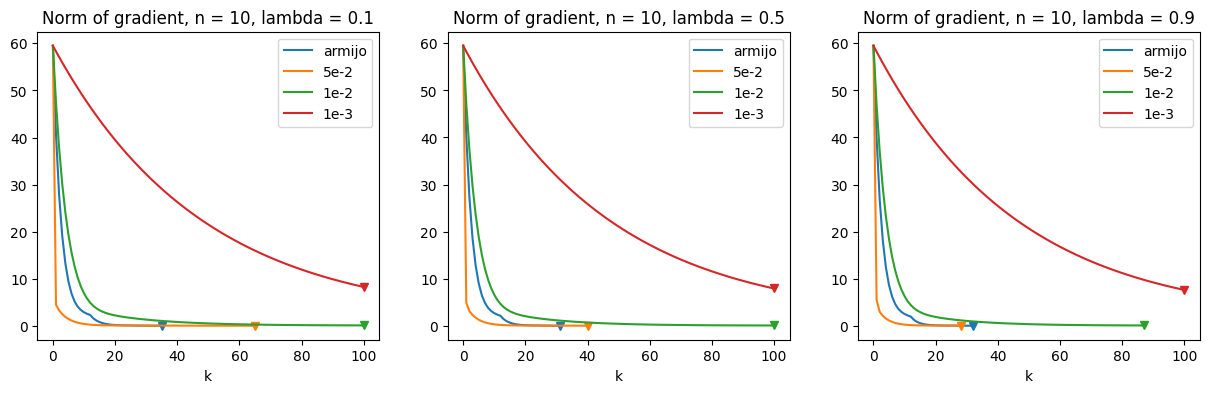

In [191]:
values_list = [
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
    {"alpha_type": "constant", "alpha_value":5e-2, "legend":"5e-2"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
    {"alpha_type": "constant", "alpha_value":1e-3, "legend":"1e-3"},
]

_, axs = plt.subplots(1, 3, figsize = (15, 4))
plot_results(10, 0.1, axs[0])
plot_results(10, 0.5, axs[1])
plot_results(10, 0.9, axs[2])
plt.show()

In [192]:
def function_5(x):
    return np.array(x**4 + x**3 - 2*x**2 - 2*x)

def grad_5(x):
    return np.array(4*x**3 + 3*x**2 - 4*x - 2)

In [197]:
values_list = [
    {"alpha_type": "constant", "alpha_value":1e-1, "legend":"1e-1"},
    {"alpha_type": "constant", "alpha_value":5e-2, "legend":"1e-1"},
    {"alpha_type": "constant", "alpha_value":1e-2, "legend":"1e-2"},
    {"alpha_type": "constant", "alpha_value":1e-3, "legend":"1e-3"},
    {"alpha_type": "armijo", "alpha_value":0, "legend":"armijo"},
]

/tmp/ipykernel_4711/3921384111.py:5: RuntimeWarning: overflow encountered in scalar power
  return np.array(4*x**3 + 3*x**2 - 4*x - 2)
/tmp/ipykernel_4711/3921384111.py:5: RuntimeWarning: invalid value encountered in scalar add
  return np.array(4*x**3 + 3*x**2 - 4*x - 2)
/tmp/ipykernel_4711/3921384111.py:2: RuntimeWarning: overflow encountered in scalar power
  return np.array(x**4 + x**3 - 2*x**2 - 2*x)
/tmp/ipykernel_4711/3921384111.py:2: RuntimeWarning: invalid value encountered in scalar add
  return np.array(x**4 + x**3 - 2*x**2 - 2*x)


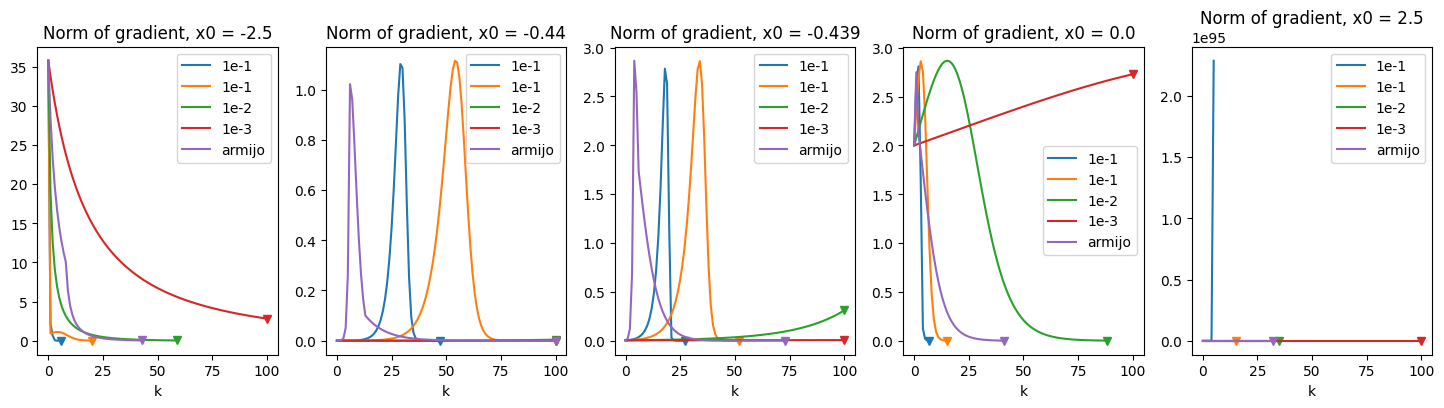

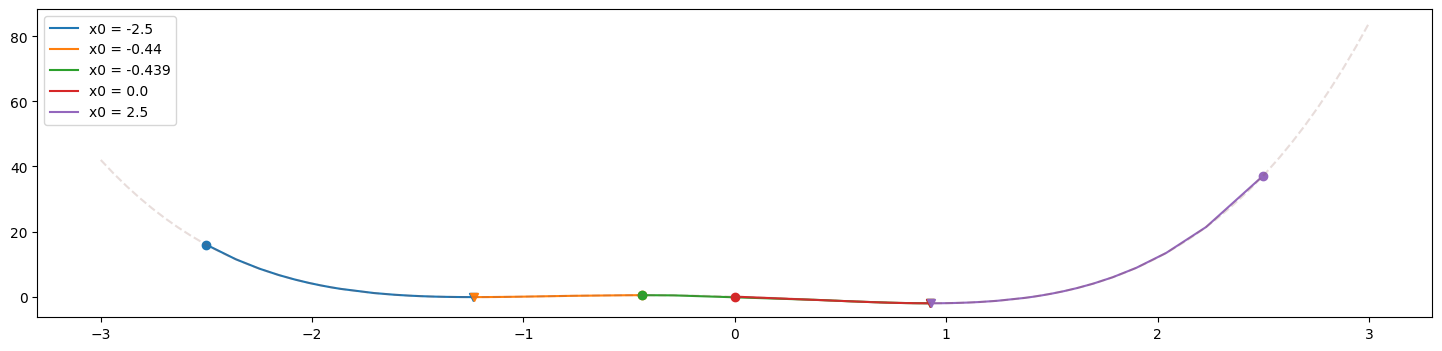

In [200]:
colors = ["b", "k", "g", "m", "r"]
def plot_results(x0, axs, ax_together):

    for values in values_list:
        x, k, f_x, grad_x, err_x = gradient_descent(function_5, grad_5, x0, kmax=100, tolf=1e-6, tolx=1e-6, alpha_type=values["alpha_type"], alpha_value=values["alpha_value"])

        p = axs.plot([np.linalg.norm(g) for g in grad_x])
        axs.plot(len(grad_x)-1, np.linalg.norm(grad_x[-1]), p[0].get_color(), marker="v", label='_nolegend_')

    axs.set_title("Norm of gradient, x0 = {}".format(x0))
    axs.set_xlabel("k")
    axs.legend([val["legend"] for val in values_list])

    p = ax_together.plot(x, f_x)
    ax_together.plot(x[0], f_x[0], p[0].get_color(), marker="o", label='_nolegend_')
    ax_together.plot(x[-1], f_x[-1], p[0].get_color(), marker="v", label='_nolegend_')

_, axs = plt.subplots(1, 5, figsize=(18, 4))
_, ax_together = plt.subplots(1, 1, figsize=(18, 4))

starting_points = np.array([-2.5, -0.44, -0.439, 0, 2.5])

for i, x0 in enumerate(starting_points):
    plot_results(x0, axs[i], ax_together)

ax_together.legend(["x0 = {}".format(s) for s in starting_points])
x = np.linspace(-3, 3, 100)
y = function_5(x)
ax_together.plot(x, y, "--", alpha=0.2)
plt.show()

Disclaimer: the last graph is made with armijo data, for all starting points.

Interesting observations:
- From the graphs in the first row, we can see the non convexity of the curve brings strange behavior: in fact, starting from an almost flat point (gradient ~0) will surely mean that the following steps' gradients will be HIGHER than the current ones, suggesting a divergent behavior.
- Armijo always converges, while constant learning rates methods only converge if they are near to the minimum and/or their step size is big enough. We can see that the biggest problem for them is to start near a maximum: in fact, only the really big learning rates allow them to escape the flat zone in a reasonable amount of steps, but with the risk that in narrower valleys the bigger learning rate will cause bouncing or divergence.
- Armijo max learning rate is 1, and from the peaks in graphs 2 and 3 in row 1, we can see that you need ~double the steps for each lowering magnitude of learning rate to escape the flat zone.
- In the last starting point, the higher learning rate (1e-1) diverges! Because the bounces on the steep sides of the valley excalate its gradient until overflow occurs.
- We can see that the right minimum is the global one, and even a small difference in starting conditions (ex. x0 = -0.44 and x0 = -0.439) will converge in two completely different points